<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_JPM_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-01 18:45:49--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.202.100, 74.125.202.113, 74.125.202.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.202.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/29jt6ibm04m3d01tfbh76ecmkhcjiaij/1672598700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=cd7009ca-cc8f-4c84-8456-02581373b96d [following]
--2023-01-01 18:45:50--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/29jt6ibm04m3d01tfbh76ecmkhcjiaij/1672598700000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=cd7009ca-cc8f-4c84-8456-02581373b96d
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.202.132, 2607:f8b0:4001:c06::84
Connecting to doc-0k

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/JPM_2008_Q3_20081015發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,JPMorgan,0.0,0.0,proper noun,compound,True,False,False,False
1,Chase,0.0,0.0,proper noun,root,True,False,False,False
2,&,0.0,0.0,coordinating conjunction,coordinating conjunction,False,False,True,False
3,Co.,0.0,0.0,proper noun,conjunct,False,False,False,False
4,(,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
12534,talk,0.0,0.0,verb,conjunct,True,False,False,False
12535,to,0.0,0.0,adposition,prepositional modifier,True,True,False,False
12536,you,0.0,0.0,pronoun,object of preposition,True,True,False,False
12537,soon,0.0,0.0,adverb,adverbial modifier,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12539 entries, 0 to 12538
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          12539 non-null  object 
 1   Polarity      12539 non-null  float64
 2   Subjectivity  12539 non-null  float64
 3   Pos_          12539 non-null  object 
 4   Dep_          12525 non-null  object 
 5   Alpha         12539 non-null  bool   
 6   Stopword      12539 non-null  bool   
 7   Punct         12539 non-null  bool   
 8   Num           12539 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 538.9+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,JPMorgan,0.0,0.0,proper noun,compound,True,False,False,False
1,Chase,0.0,0.0,proper noun,root,True,False,False,False
5,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
7,JPM,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
11,Earnings,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
12524,comments,0.0,0.0,noun,object of preposition,True,False,False,False
12526,James,0.0,0.0,proper noun,compound,True,False,False,False
12527,DimonThank,0.0,0.0,proper noun,root,True,False,False,False
12534,talk,0.0,0.0,verb,conjunct,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
11,Earnings,0.0,0.0,noun,compound,True,False,False,False
22,CFOJames,0.0,0.0,noun,compound,True,False,False,False
73,morning,0.0,0.0,noun,compound,True,False,False,False
74,ladies,0.0,0.0,noun,appositional modifier,True,False,False,False
76,gentlemen,0.0,0.0,noun,conjunct,True,False,False,False
...,...,...,...,...,...,...,...,...,...
12521,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False
12523,closing,0.0,0.0,noun,conjunct,True,False,False,False
12524,comments,0.0,0.0,noun,object of preposition,True,False,False,False
12534,talk,0.0,0.0,verb,conjunct,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
78,Welcome,0.8,0.9,interjection,root,True,False,False,False
93,contain,0.0,0.0,verb,root,True,False,False,False
94,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
96,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False
97,statements,0.0,0.0,noun,direct object,True,False,False,False
...,...,...,...,...,...,...,...,...,...
12487,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
12503,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False
12511,like,0.0,0.0,verb,root,True,False,False,False
12521,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
78,Welcome,0.800000,0.900000,interjection,root,True,False,False,False
94,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False
96,looking,0.000000,0.000000,verb,adjectival modifier,True,False,False,False
117,current,0.000000,0.400000,adjective,adjectival modifier,True,False,False,False
128,subject,-0.166667,0.333333,adjective,adjectival complement,True,False,False,False
...,...,...,...,...,...,...,...,...,...
12449,good,0.700000,0.600000,adjective,adjectival modifier,True,False,False,False
12487,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False
12503,additional,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False
12521,additional,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    859.000000
mean       0.071089
std        0.245795
min       -0.900000
25%        0.000000
50%        0.000000
75%        0.100000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    859.000000
mean       0.303940
std        0.333329
min        0.000000
25%        0.000000
50%        0.200000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
78,Welcome,0.800000,0.900000,interjection,root,True,False,False,False,Positive,Subjective
94,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
96,looking,0.000000,0.000000,verb,adjectival modifier,True,False,False,False,Neutral,Objective
117,current,0.000000,0.400000,adjective,adjectival modifier,True,False,False,False,Neutral,Subjective
128,subject,-0.166667,0.333333,adjective,adjectival complement,True,False,False,False,Negative,Subjective
...,...,...,...,...,...,...,...,...,...,...,...
12449,good,0.700000,0.600000,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
12487,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
12503,additional,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
12521,additional,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Objective,1
1,Negative,Subjective,97
2,Neutral,Objective,381
3,Neutral,Subjective,134
4,Positive,Subjective,246


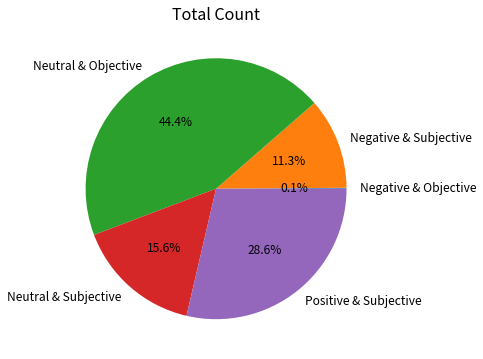

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

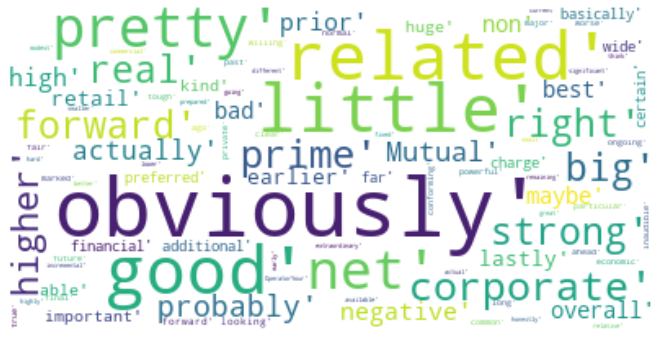

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,JPMorgan Chase & Co. (NYSE:JPM) Q3 2008 Earnin...,0.000000,0.000000
1,Welcome to the JPMorgan Chase third quarter 20...,0.400000,0.450000
2,Today's presentation may contain forward-looki...,0.000000,0.375000
3,Such statements are based on the current belie...,0.052083,0.527083
4,Actual results may differ from those set forth...,0.000000,0.100000
...,...,...,...
364,What you’ve seen them do is be pretty aggressi...,0.475000,0.800000
365,So they’re going to have to throughout this pr...,0.000000,0.000000
366,So you will be looking at how they really mana...,0.100000,0.100000
367,OperatorThere are no additional questions at t...,0.000000,0.000000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    369.000000
mean       0.101149
std        0.198467
min       -0.700000
25%        0.000000
50%        0.015741
75%        0.200000
max        0.910000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    369.000000
mean       0.327400
std        0.260524
min        0.000000
25%        0.066667
50%        0.333333
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,JPMorgan Chase & Co. (NYSE:JPM) Q3 2008 Earnin...,0.000000,0.000000,Neutral,Objective
1,Welcome to the JPMorgan Chase third quarter 20...,0.400000,0.450000,Positive,Subjective
2,Today's presentation may contain forward-looki...,0.000000,0.375000,Neutral,Subjective
3,Such statements are based on the current belie...,0.052083,0.527083,Positive,Subjective
4,Actual results may differ from those set forth...,0.000000,0.100000,Neutral,Subjective
...,...,...,...,...,...
364,What you’ve seen them do is be pretty aggressi...,0.475000,0.800000,Positive,Subjective
365,So they’re going to have to throughout this pr...,0.000000,0.000000,Neutral,Objective
366,So you will be looking at how they really mana...,0.100000,0.100000,Positive,Subjective
367,OperatorThere are no additional questions at t...,0.000000,0.000000,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,52
1,Neutral,Objective,91
2,Neutral,Subjective,34
3,Positive,Subjective,192


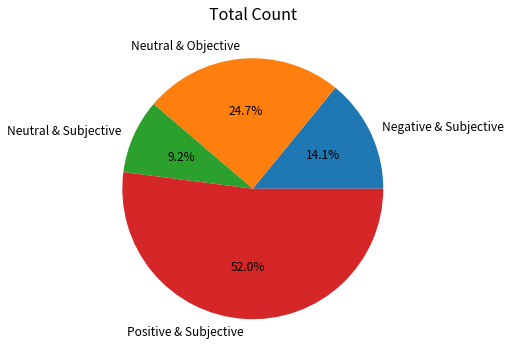

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

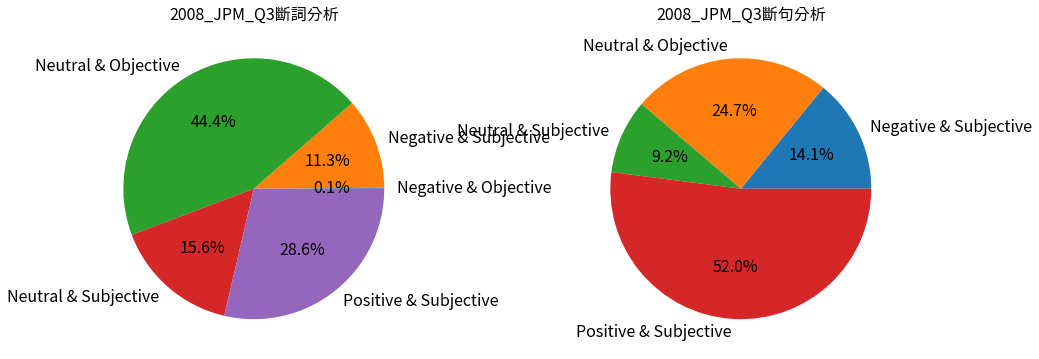

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
label2 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]


axs[0].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2008_JPM_Q3斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2008_JPM_Q3斷句分析', fontsize=16)


plt.savefig("2008_JPM_Q3.png")
from google.colab import files
files.download("2008_JPM_Q3.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
